In [359]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import animation
import copy

In [360]:
# 参数设置
d = 2
w_max = 0.9
w_min = 0.4
c1 = 2
c2 = 2
particle_size = d
swarm_size = 50
iter_max = 100
value_range = 10
best_aff = 0
w = w_max

In [361]:
# 代价函数

In [362]:
def rastrigin(x):
    Z = 10 * d
    for i in range(d):
        Z = Z + x[i] ** 2 - 10 * np.cos(2 * np.pi * x[i])
    return Z

In [363]:
# 初始化粒子群

In [364]:
def init_pso():
    g_aff = 99999999
    X = np.zeros((swarm_size,particle_size))
    V = np.zeros((swarm_size,particle_size))
    p_best = np.zeros((swarm_size,particle_size))
    p_aff = np.zeros(swarm_size)
    g_best = np.zeros(particle_size)
    for i in range(swarm_size):
        for j in range(particle_size):
            X[i][j] = random.random()*2*value_range-value_range
            V[i][j] = random.random()*2*value_range-value_range
        p_best[i] = X[i]
        aff = rastrigin(X[i])
        p_aff[i] = aff
        if aff < g_aff:
            g_aff = aff
            g_best = X[i]
    return X,V,p_best,p_aff,g_best,g_aff

In [365]:
# 更新w值

In [366]:
def change_w(t):
    w = w_max - ((w_max - w_min) / iter_max) * t
    return w

In [367]:
# 约束条件

In [368]:
def project(X):
    for i in range(particle_size):
        if X[i] > value_range:
            X[i] = value_range
        elif X[i] < -value_range:
            X[i] = -value_range
    return X     

In [369]:
# 主程序

In [370]:
aff_arr = []
point_arr = []
all_point_arr = []

In [371]:
X,V,p_best,p_aff,g_best,g_aff = init_pso()
aff_arr.append(g_aff)
point_arr.append(g_best[:])
all_point_arr.append(copy.deepcopy(X))
print('--------------初始化------------')
print('最佳的适应度值为：',g_aff)
print('粒子到过最优位置为：',g_best)

--------------初始化------------
最佳的适应度值为： 18.42835595273897
粒子到过最优位置为： [ 0.91429337 -4.0158891 ]


In [372]:
for i in range(iter_max):
    for p in range(swarm_size):
        for q in range(particle_size):
            V[p][q] = w * V[p][q] + c1 * random.random() * (p_best[p][q] - X[p][q]) + c2 * random.random() * (g_best[q] - X[p][q])
            X[p][q] = X[p][q] + V[p][q]
        V[p] = project(V[p])
        X[p] = project(X[p])
        aff = rastrigin(X[p])
        if aff < p_aff[p]:
            p_aff[p] = aff
            p_best[p] = copy.deepcopy(X[p])
        if aff < g_aff:
            g_aff = aff
            g_best = copy.deepcopy(X[p])
    w = change_w(i)
    aff_arr.append(g_aff)
    point_arr.append(copy.deepcopy(g_best))
    all_point_arr.append(copy.deepcopy(X))
    print('--------------第'+str(i+1)+'步------------')
    print('最佳的适应度值为：',g_aff)
    print('粒子到过最优位置为：',g_best)
print('达到终止条件，运行结束')

--------------第1步------------
最佳的适应度值为： 7.343333971588978
粒子到过最优位置为： [ 1.16502346 -0.97481579]
--------------第2步------------
最佳的适应度值为： 7.343333971588978
粒子到过最优位置为： [ 1.16502346 -0.97481579]
--------------第3步------------
最佳的适应度值为： 7.343333971588978
粒子到过最优位置为： [ 1.16502346 -0.97481579]
--------------第4步------------
最佳的适应度值为： 7.343333971588978
粒子到过最优位置为： [ 1.16502346 -0.97481579]
--------------第5步------------
最佳的适应度值为： 6.887534423029404
粒子到过最优位置为： [ 1.05891334 -0.16778121]
--------------第6步------------
最佳的适应度值为： 6.887534423029404
粒子到过最优位置为： [ 1.05891334 -0.16778121]
--------------第7步------------
最佳的适应度值为： 4.4616001005736265
粒子到过最优位置为： [ 2.00358328 -0.04752119]
--------------第8步------------
最佳的适应度值为： 4.4616001005736265
粒子到过最优位置为： [ 2.00358328 -0.04752119]
--------------第9步------------
最佳的适应度值为： 4.4616001005736265
粒子到过最优位置为： [ 2.00358328 -0.04752119]
--------------第10步------------
最佳的适应度值为： 4.4616001005736265
粒子到过最优位置为： [ 2.00358328 -0.04752119]
--------------第11步------------
最佳的适应度值为： 4.46

<IPython.core.display.Javascript object>


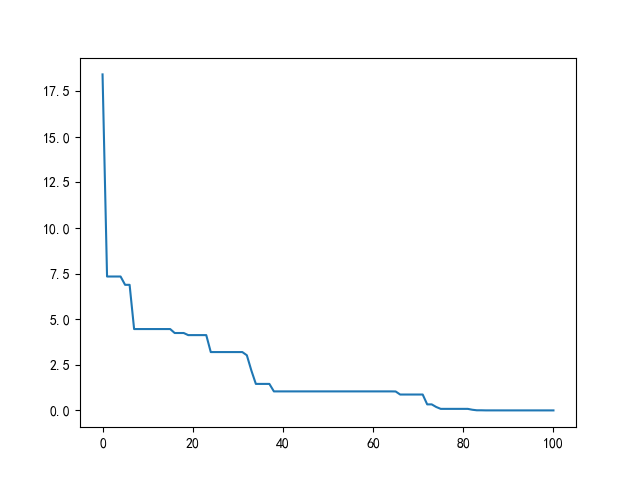

In [373]:
%matplotlib notebook 
plt.plot(aff_arr)
plt.show()

<IPython.core.display.Javascript object>


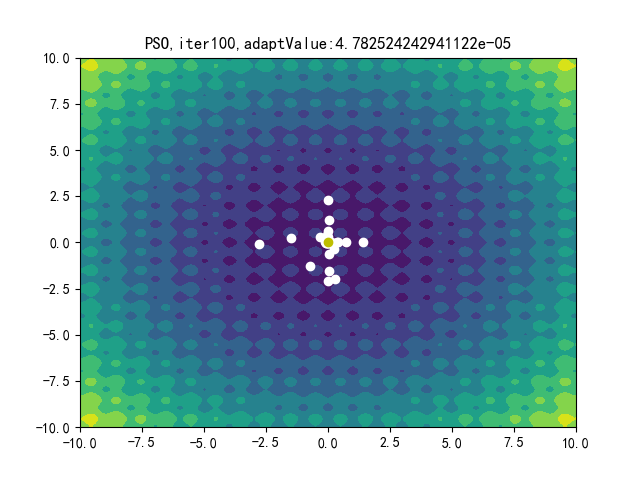

In [374]:
%matplotlib notebook 
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots()
xdata = all_point_arr
best_data = point_arr
n = 500
x = np.linspace(-value_range, value_range, n)
y = np.linspace(-value_range, value_range, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, rastrigin([X,Y]))
point1, = plt.plot(xdata[0][:,0],xdata[0][:,1], 'wo')
point2, = plt.plot(best_data[0][0],best_data[0][1], 'yo')

def init():
    ax.set_xlim(-value_range, value_range)
    ax.set_ylim(-value_range, value_range)
    return point

def update(frame):  # 帧
    point1.set_data(xdata[frame][:,0],xdata[frame][:,1])
    point2.set_data(best_data[frame][0],best_data[frame][1])
    i = frame
    a = rastrigin(best_data[frame])
    ax.set_title('PSO,iter'+str(i)+',adaptValue:'+str(a),loc = 'center')
    return point

ani = animation.FuncAnimation(
    fig=fig,
    func=update,
    frames=range(len(all_point_arr)),
    init_func=init,
    interval=200,  # 时间间隔: 毫秒
    repeat=False)


plt.show()
ani.save('PSO.gif',writer='pillow')